<a href="https://colab.research.google.com/github/Fillomon/CienciaDatos/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.graph_objects as go

#DIRECCION DE ARCHIVOS CSV
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

#SELECCION DE LOS MINIMOS, QUE NO SON MINIMOS SON MARCADOS EN VERDE
def minimos_color(col):
    min_val=col.min();
    return['background-color: lightcoral' if v==min_val else 'background-color: green' for v in col]

#SELECCION DE MAXIMOS Y MARCADOS EN COLOR
def maximo_color(col):
    max_val=col.max()
    return ['background-color: lightcoral' if v == max_val else 'background-color: green' for v in col]

#FUNCION FACTURACION, COSTO - ENVIO, GANANCIA Y TIENDA
def resumen_mensual(df_tienda, nombre_tienda):
    agrupado = df_tienda.groupby(['ano-mes'])
    data = []
    for nombre, grupo_df in agrupado:
        TotFact = grupo_df['Precio']
        TotCosto = grupo_df['Costo de envío']
        TotalGanancia = TotFact - TotCosto
        data.append({
            "Grupo": nombre,
            "Facturado": TotFact.sum(),
            "CostoEnvio": TotCosto.sum(),
            "Ganancia": TotalGanancia.sum(),
            "Tienda": nombre_tienda
        })
    return pd.DataFrame(data)

##CONECTAMOS LAS URL DE LOS ARCHIVOS CON VARIABLES
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
#tienda.head()

###################################################
tienda['anho-mes'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha
tienda2['anho-mes'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha
tienda3[  'anho-mes'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha
tienda4['anho-mes'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y').dt.strftime('%Y-%m') # Convertir a tipo de dato fecha

dTienda1= pd.DataFrame(tienda)
dTiendaClear= dTienda1.drop(columns=['Cantidad de cuotas', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra']).sort_values(by='Producto', ascending=True)

dTienda2= pd.DataFrame(tienda2)
dTienda2Clear= dTienda2.drop(columns=['Cantidad de cuotas', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra']).sort_values(by='Producto', ascending=True)

dTienda3= pd.DataFrame(tienda3)
dTienda3Clear= dTienda3.drop(columns=['Cantidad de cuotas', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra']).sort_values(by='Producto', ascending=True)

dTienda4= pd.DataFrame(tienda4)
dataTienda4Clear= dTienda4.drop(columns=['Cantidad de cuotas', 'Método de pago', 'Fecha de Compra','Vendedor','Lugar de Compra']).sort_values(by='Producto', ascending=True)



#1. Análisis de facturación



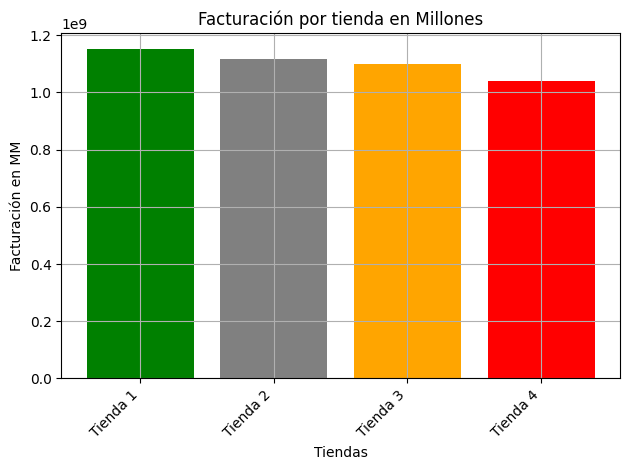

In [6]:
fTienda1= dTienda1['Precio'].sum()
fTienda2= dTienda2['Precio'].sum()
fTienda3= dTienda3['Precio'].sum()
fTienda4= dTienda4['Precio'].sum()
#fTienda# refiere a facturas de la tienda que se esta visualizando

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas = [fTienda1, fTienda2, fTienda3, fTienda4]
colores=['green', 'grey', 'orange', 'red']

plt.bar(tiendas, facturas, color=colores)
plt.xlabel('Tiendas')
plt.ylabel('Facturación en MM')
plt.title("Facturación por tienda en Millones")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid()

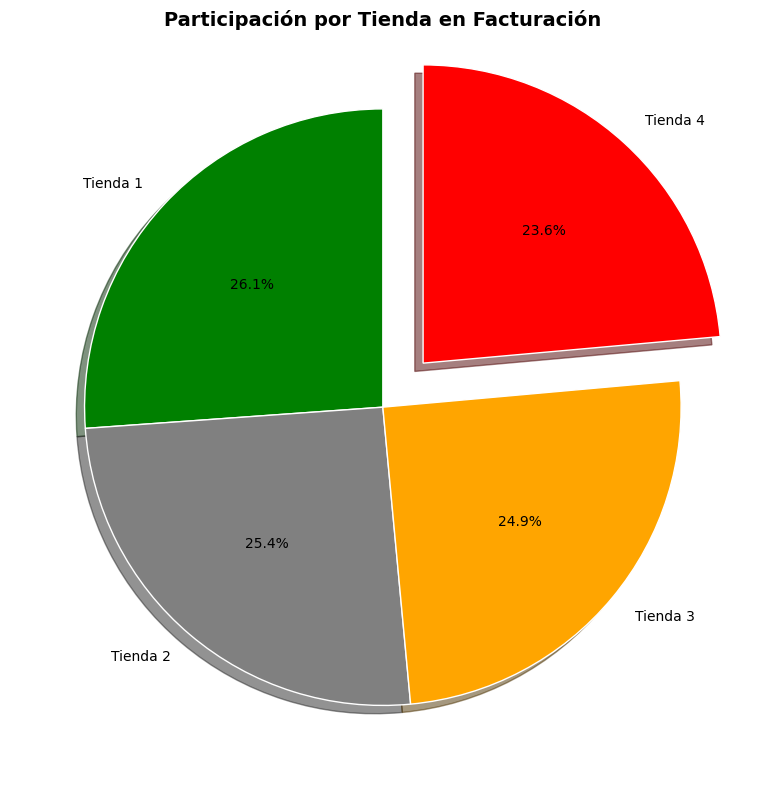

In [7]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas = [fTienda1, fTienda2, fTienda3, fTienda4]
colores=['green', 'grey', 'orange', 'red']
separacion = [0, 0, 0, 0.2]

plt.figure(figsize=(8, 8))  # Tamaño más amigable
plt.pie(
    facturas,
    labels=tiendas,
    explode=separacion,
    colors=colores,
    shadow=True,
    autopct='%1.1f%%',  # Muestra el porcentaje con un decimal
    startangle=90,     # Rotación para mejor distribución visual
    wedgeprops={'edgecolor': 'white'}  # Borde blanco para más claridad
)
plt.title("Participación por Tienda en Facturación", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

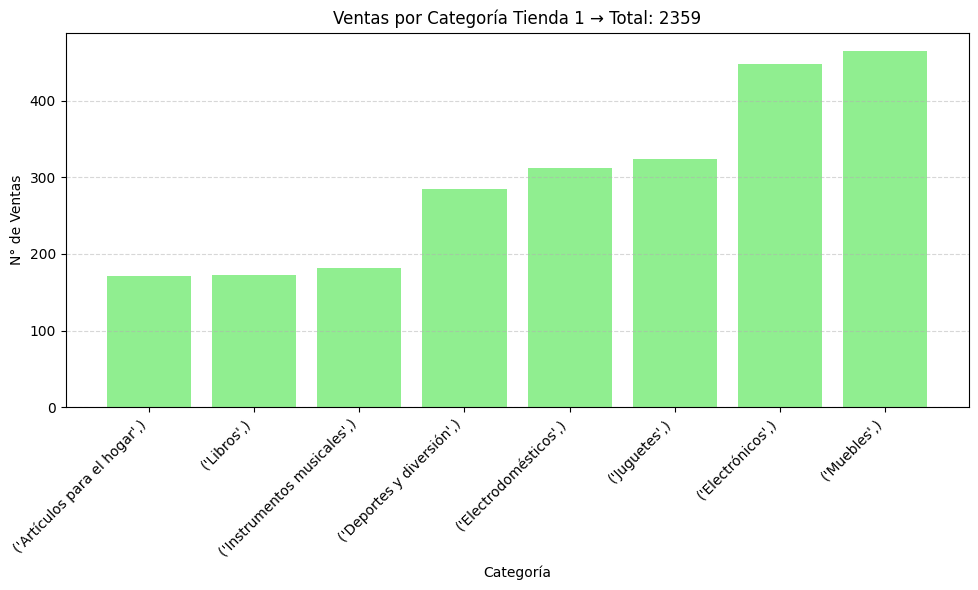

In [8]:
#################### TIENDA 1

# Agrupar y contar
total = 0
group_data = []
catTienda1=dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    count = grupo_df.shape[0]
    total += count
    group_data.append({"Grupo": nombre, "Count": count})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Count', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Count'], color='lightgreen')
plt.xlabel('Categoría')
plt.ylabel('N° de Ventas')
plt.title(f"Ventas por Categoría Tienda 1 → Total: {total}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

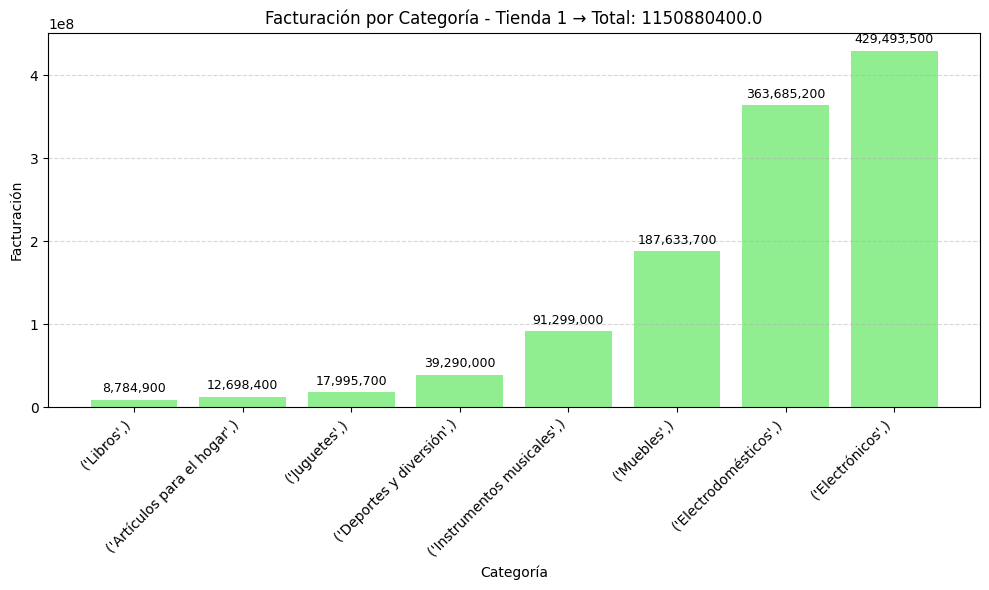

In [9]:
# Agrupar y sumar la facturación por categoría
total = 0
group_data = []
catTienda1 = dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    suma_facturacion = grupo_df['Precio'].sum()
    total += suma_facturacion
    group_data.append({"Grupo": nombre, "Facturación": suma_facturacion})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Facturación', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Facturación'], color='lightgreen')
plt.xlabel('Categoría')
plt.ylabel('Facturación')
plt.title(f"Facturación por Categoría - Tienda 1 → Total: {round(total, 2)}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Agregar valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + (total * 0.005),  # posición y ajuste
             f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)


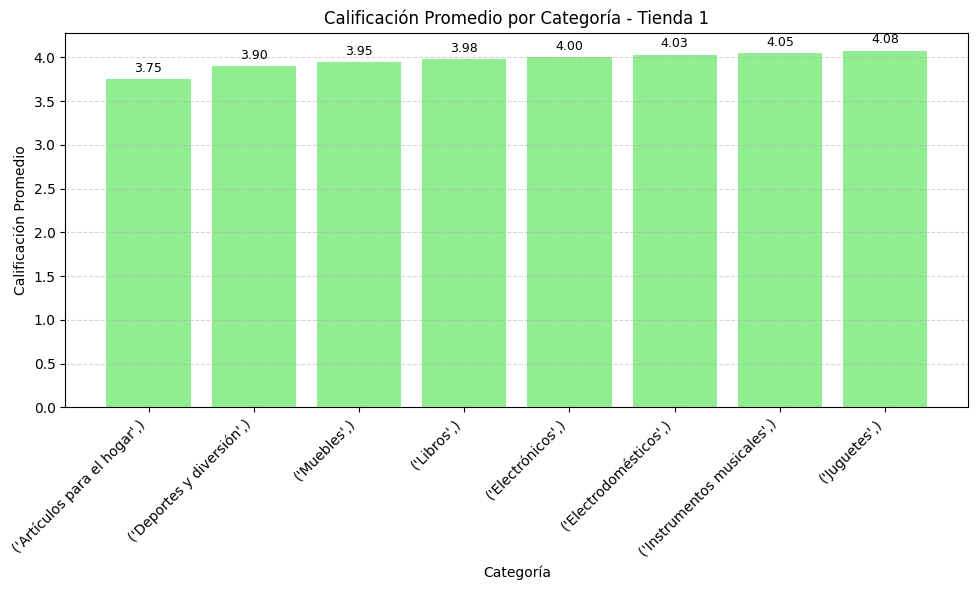

In [10]:
# Agrupar y calcular la calificación promedio por categoría
group_data = []
catTienda1 = dTiendaClear.groupby(['Categoría del Producto'])

for nombre, grupo_df in catTienda1:
    promedio_calificacion = grupo_df['Calificación'].mean()
    group_data.append({"Grupo": nombre, "Calificación Promedio": promedio_calificacion})

# Convertir a DataFrame y ordenar de menor a mayor
df_categorias = pd.DataFrame(group_data)
df_categorias = df_categorias.sort_values(by='Calificación Promedio', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
bars = plt.bar(df_categorias['Grupo'].astype(str), df_categorias['Calificación Promedio'], color='lightgreen')
plt.xlabel('Categoría')
plt.ylabel('Calificación Promedio')
plt.title("Calificación Promedio por Categoría - Tienda 1")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar el valor sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05,
             f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda